In [0]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
df = pd.read_csv('/content/city_day.csv')

In [5]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:
df.isnull().sum()

City              0
Date              0
PM2.5          4289
PM10          10766
NO             3233
NO2            3217
NOx            4043
NH3            9847
CO             1961
SO2            3544
O3             3660
Benzene        5287
Toluene        7555
Xylene        16807
AQI            4282
AQI_Bucket     4282
dtype: int64

In [0]:
df['PM2.5'].fillna(df['PM2.5'].mean(), inplace= True)
df['NO'].fillna(df['NO'].mean(), inplace= True)
df['NO2'].fillna(df['NO2'].mean(), inplace= True)
df['NOx'].fillna(df['NOx'].mean(), inplace= True)
df['NH3'].fillna(df['NH3'].mean(), inplace= True)
df['CO'].fillna(df['CO'].mean(), inplace= True)
df['SO2'].fillna(df['SO2'].mean(), inplace= True)
df['O3'].fillna(df['O3'].mean(), inplace= True)
df['Benzene'].fillna(df['Benzene'].mean(), inplace= True)
df['Toluene'].fillna(df['Toluene'].mean(), inplace= True)
df['Xylene'].fillna(df['Xylene'].mean(), inplace= True)
df['AQI'].fillna(df['AQI'].mean(), inplace= True)

In [0]:
df  = df.drop(['City','PM10','AQI_Bucket'], axis = 1)

In [9]:
df.head()

,Date,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,2015-01-01,71.828907,0.92,18.22,17.15,25.336162,0.92,27.64,133.36,0.00,0.02,0.00,175.840908
1,2015-01-02,71.828907,0.97,15.69,16.46,25.336162,0.97,24.55,34.06,3.68,5.50,3.77,175.840908
2,2015-01-03,71.828907,17.40,19.30,29.70,25.336162,17.40,29.07,30.70,6.80,16.40,2.25,175.840908
3,2015-01-04,71.828907,1.70,18.48,17.97,25.336162,1.70,18.59,36.08,4.43,10.14,1.00,175.840908
4,2015-01-05,71.828907,22.10,21.42,37.76,25.336162,22.10,39.33,39.31,7.01,18.89,2.78,175.840908


In [10]:
df.isnull().sum()

Date       0
PM2.5      0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [0]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_index()

In [0]:
def positive_average(num):
    return num[num > -200].mean()
    
df = df.groupby('Date').apply(positive_average)

In [13]:
df.head(1)

,PM2.5,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
Date,,,,,,,,,,,,
2015-01-01,112.060756,18.330421,21.633184,32.208333,22.468081,4.961667,39.031456,42.902375,2.74,7.079966,3.217947,225.200757


In [0]:
weekly_data = df.resample('W').mean()

In [15]:
weekly_data.shape

(279, 12)

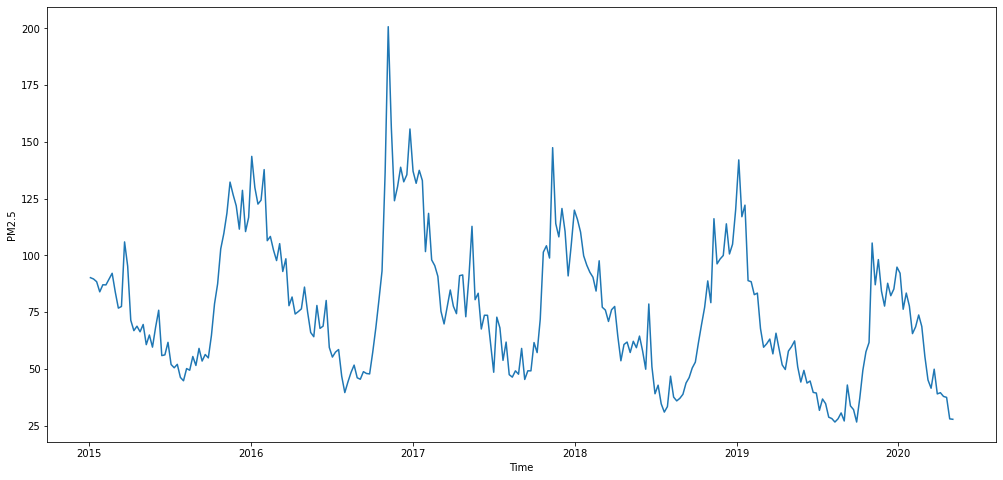

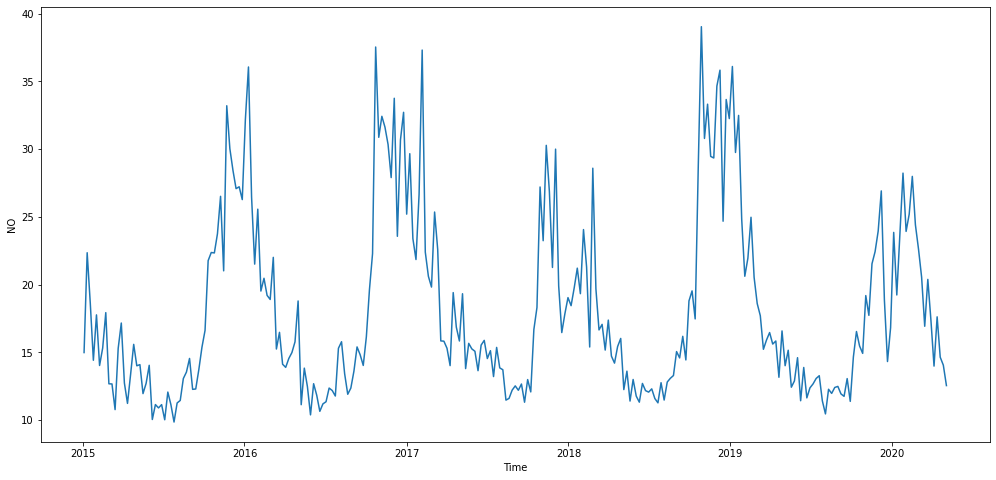

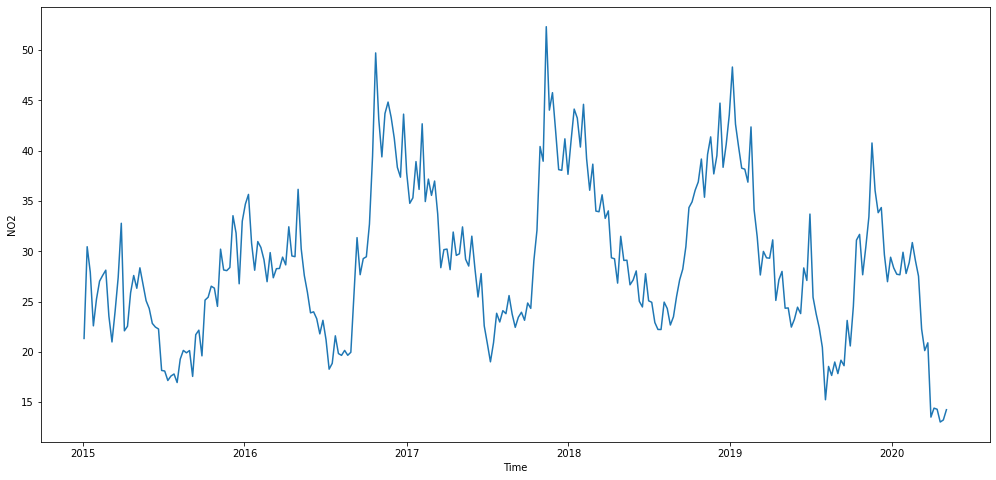

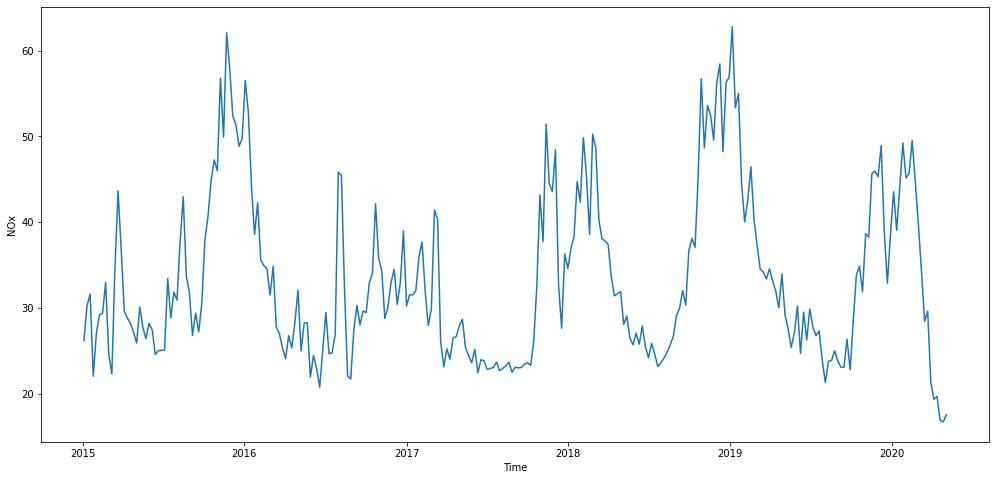

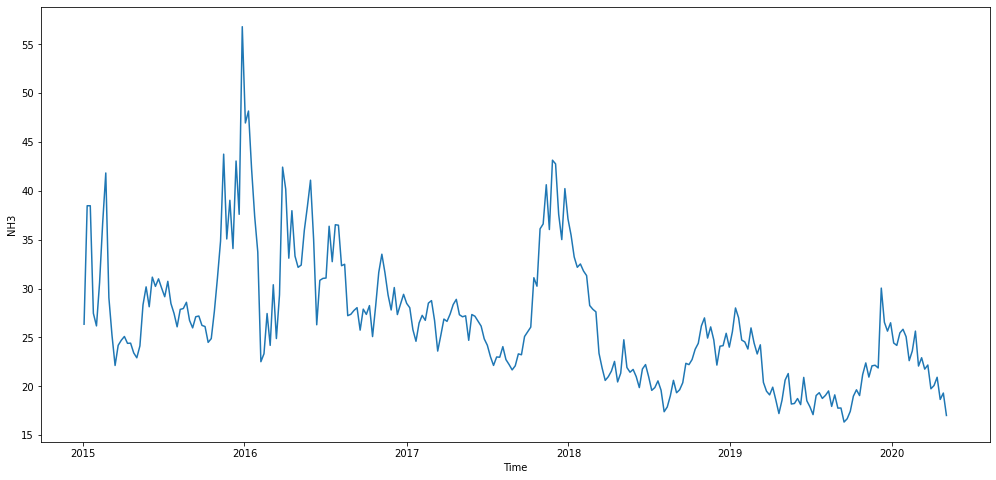

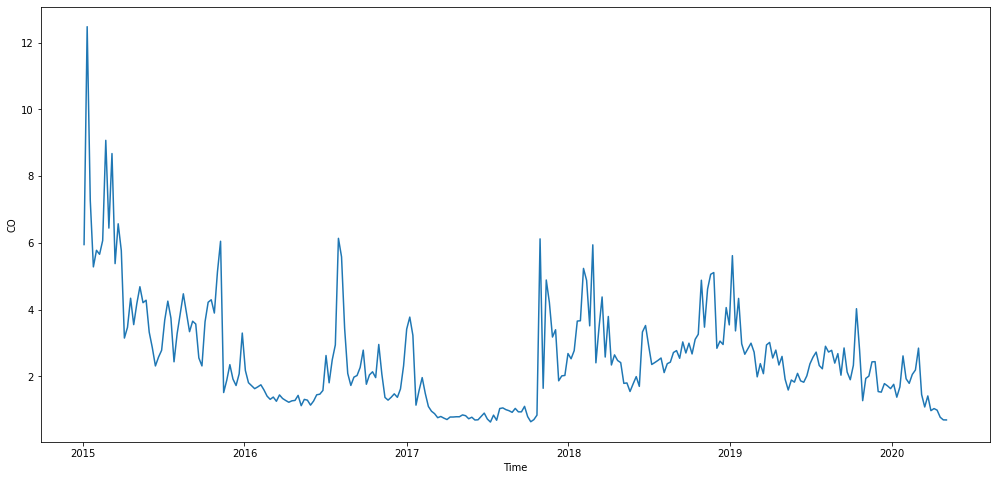

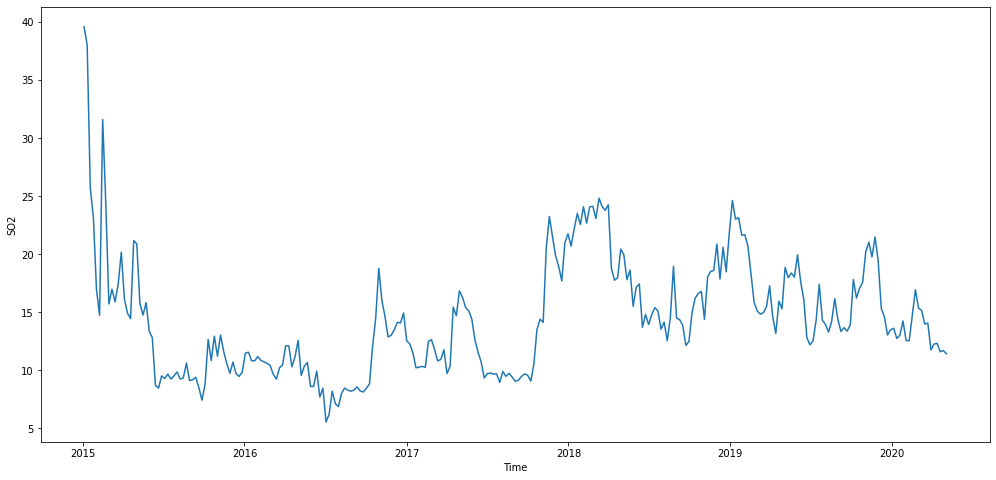

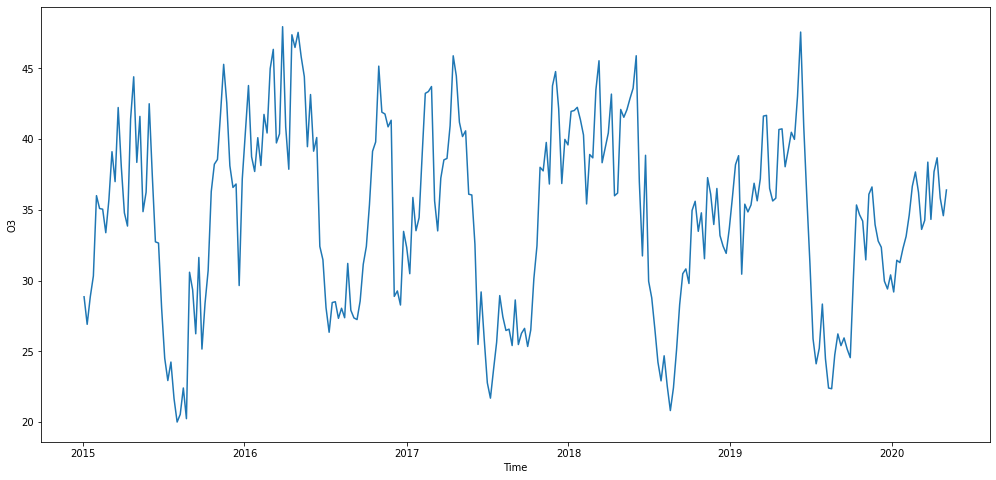

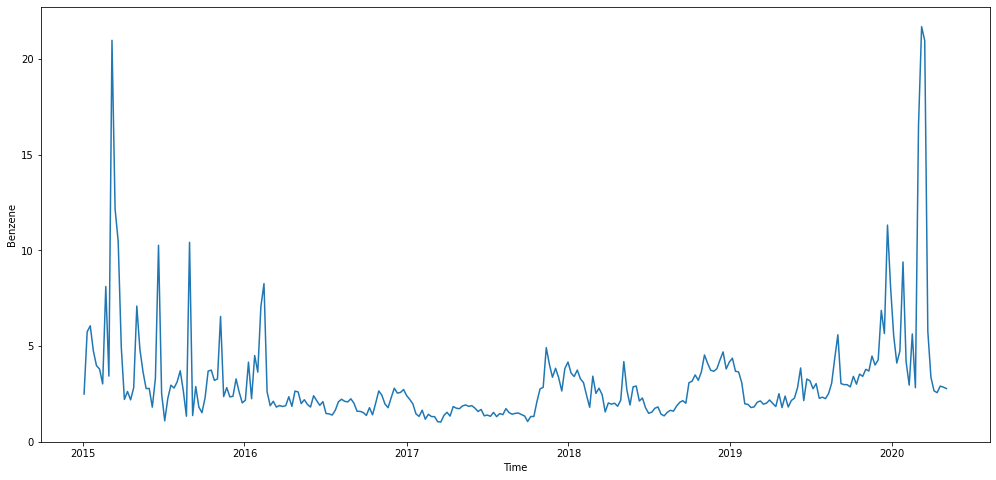

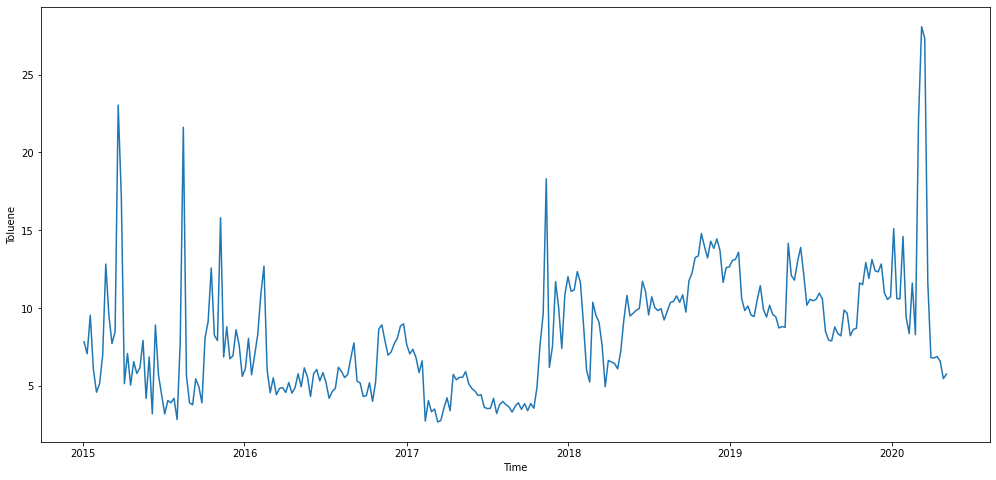

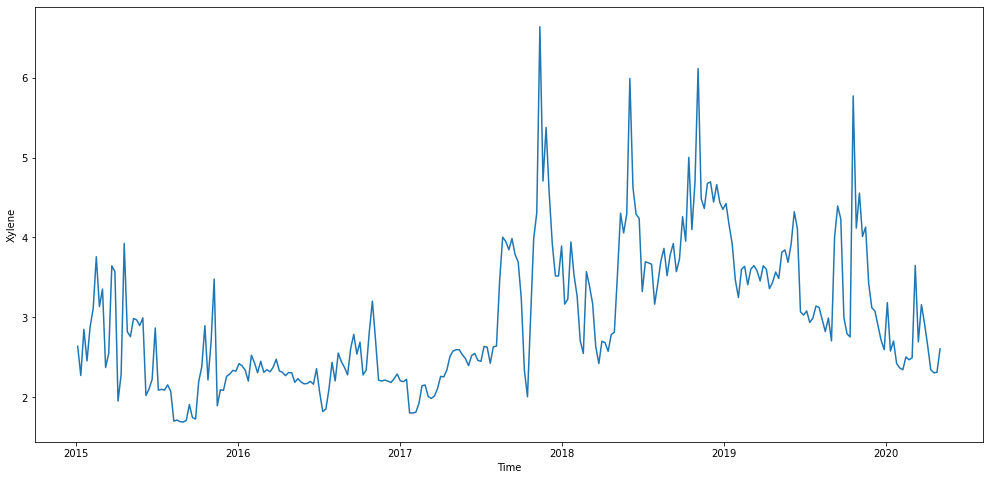

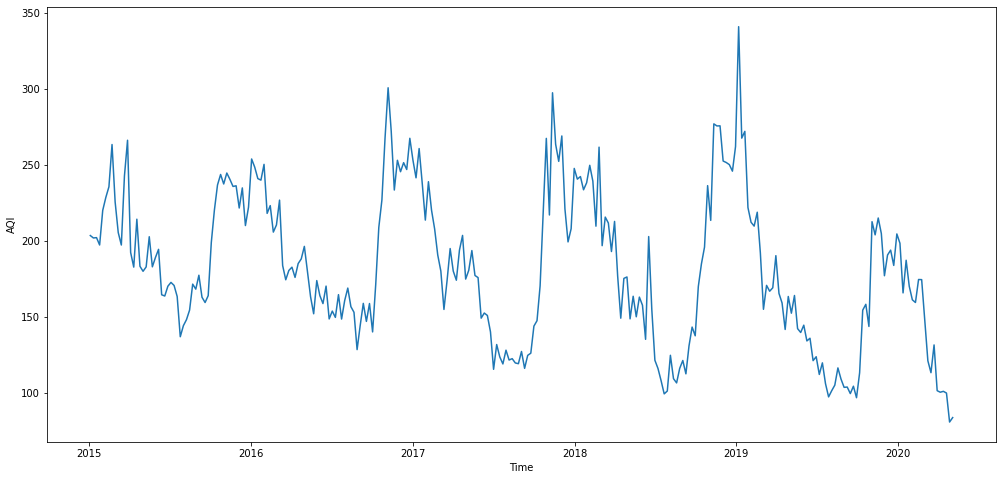

In [16]:
def plot_data(col):
    plt.figure(figsize=(17, 8))
    plt.plot(weekly_data[col])
    plt.xlabel('Time')
    plt.ylabel(col)
    plt.grid(False)
    plt.show()
    
for col in weekly_data.columns:
    plot_data(col)

**NOx forcasting**

In [0]:
data_nox = weekly_data['NOx']

In [18]:
data_nox.head()

Date
2015-01-04    26.211071
2015-01-11    30.246327
2015-01-18    31.622041
2015-01-25    22.036327
2015-02-01    27.018367
Freq: W-SUN, Name: NOx, dtype: float64

In [0]:
df_before_covid_nox =data_nox.loc['2016-01-01' : '2020-03-23' ]
df_after_covid_nox = df.loc['2020-03-24' :]

In [0]:
df_after_covid_nox = df_after_covid_nox['NOx']

In [21]:
df_after_covid_nox.head()

Date
2020-03-24    23.887819
2020-03-25    26.102819
2020-03-26    20.047819
2020-03-27    19.667819
2020-03-28    18.992306
Name: NOx, dtype: float64

In [0]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

In [23]:
df1 = df_before_covid_nox.reset_index()
df1.columns = ['ds', 'y']
df1.head()

,ds,y
0,2016-01-03,56.516688
1,2016-01-10,52.840265
2,2016-01-17,44.221767
3,2016-01-24,38.557921
4,2016-01-31,42.260032


In [0]:

prediction_size = 250


In [25]:

m1 = Prophet()
m1.fit(df1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future1 = m1.make_future_dataframe(periods=prediction_size)

forecast1 = m1.predict(future1)

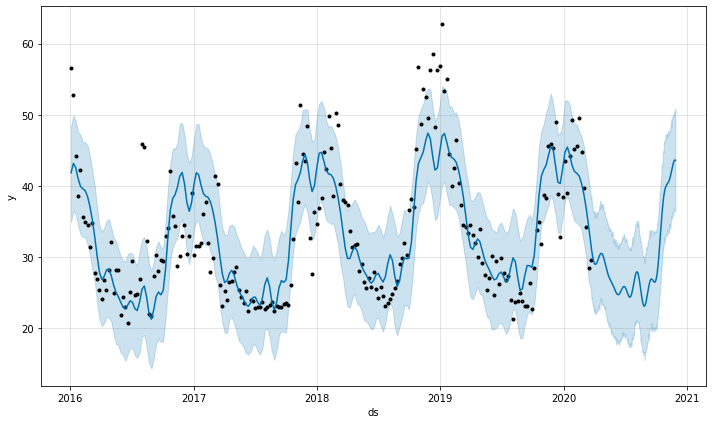

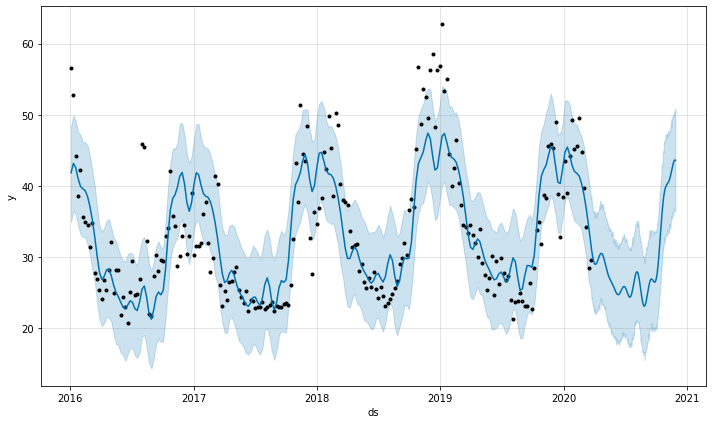

In [27]:

m1.plot(forecast1)

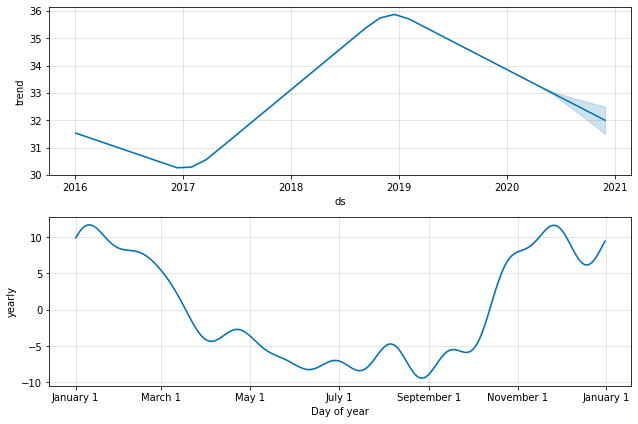

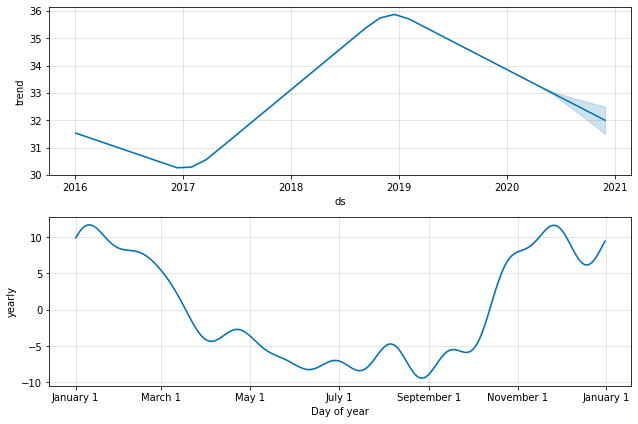

In [28]:
m1.plot_components(forecast1)

In [0]:

def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [30]:
cmp_df1 = make_comparison_dataframe(df1, forecast1)

cmp_df1.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2016-01-03,41.864872,34.961990,48.354698,56.516688
2016-01-10,43.179539,36.503758,49.905135,52.840265
2016-01-17,42.553137,35.970854,49.177934,44.221767
2016-01-24,41.024149,34.445241,47.549765,38.557921
2016-01-31,39.945206,33.247893,47.207459,42.260032


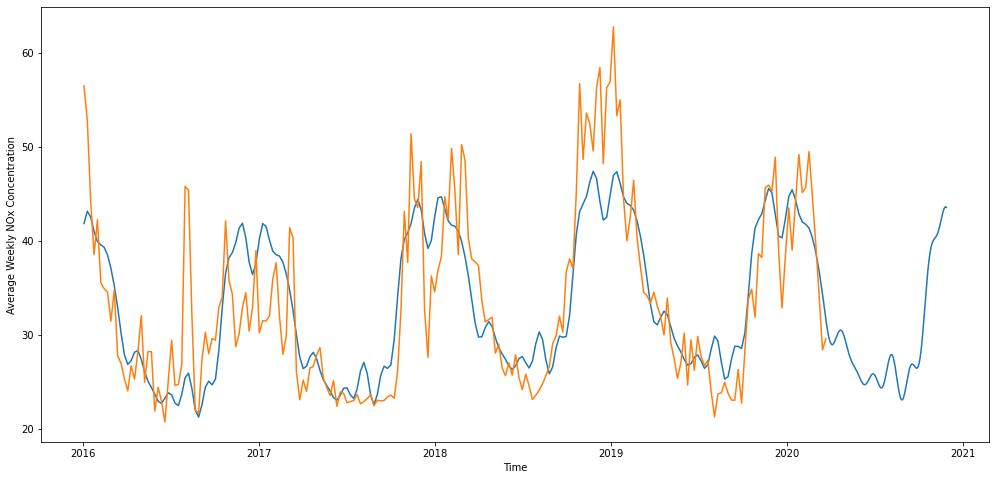

In [31]:

plt.figure(figsize=(17, 8))
plt.plot(cmp_df1['yhat'])
plt.plot(cmp_df1['y'])
plt.xlabel('Time')
plt.ylabel('Average Weekly NOx Concentration')
plt.grid(False)
plt.show()

**NOx during covid**

In [32]:
df_after_covid_nox.head()

Date
2020-03-24    23.887819
2020-03-25    26.102819
2020-03-26    20.047819
2020-03-27    19.667819
2020-03-28    18.992306
Name: NOx, dtype: float64

In [33]:
df2 = df_after_covid_nox.reset_index()
df2.columns = ['ds', 'y']
df2.head()

,ds,y
0,2020-03-24,23.887819
1,2020-03-25,26.102819
2,2020-03-26,20.047819
3,2020-03-27,19.667819
4,2020-03-28,18.992306


In [34]:
m2 = Prophet()
m2.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future2 = m2.make_future_dataframe(periods=40)

forecast2 = m2.predict(future2)

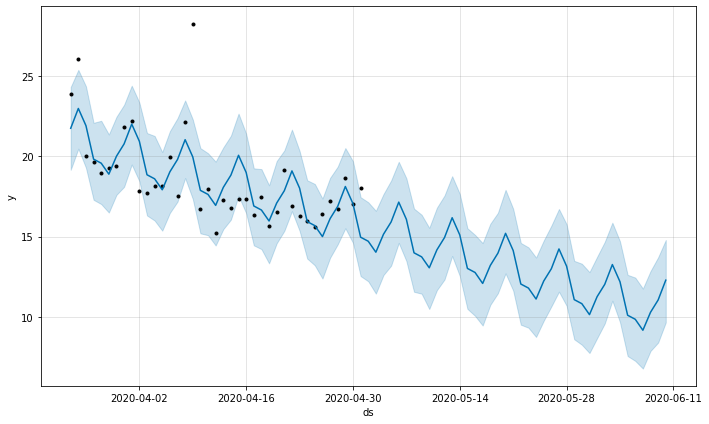

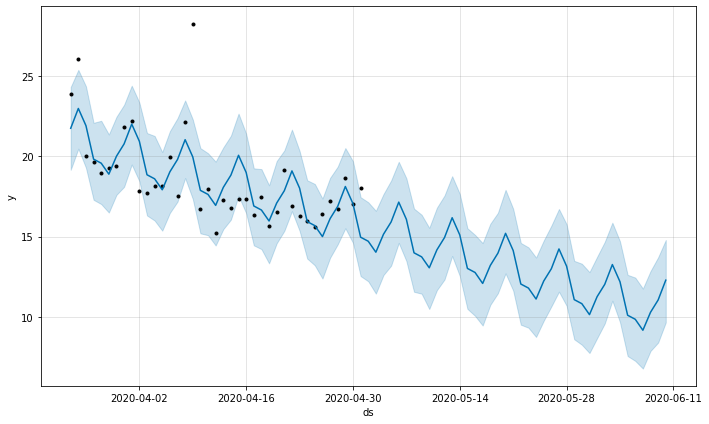

In [36]:
m2.plot(forecast2)

In [0]:

def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [38]:
cmp_df2 = make_comparison_dataframe(df2, forecast2)

cmp_df2.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2020-03-24,21.755721,19.167606,24.325855,23.887819
2020-03-25,22.991471,20.484448,25.398881,26.102819
2020-03-26,21.917272,19.289619,24.371476,20.047819
2020-03-27,19.830381,17.294721,22.096218,19.667819
2020-03-28,19.578017,17.029382,22.222923,18.992306


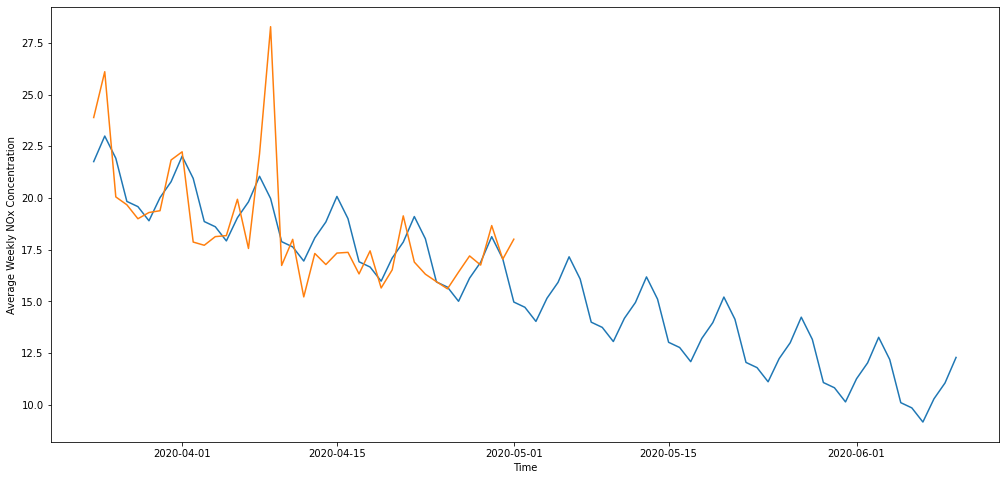

In [39]:

plt.figure(figsize=(17, 8))
plt.plot(cmp_df2['yhat'])
plt.plot(cmp_df2['y'])
plt.xlabel('Time')
plt.ylabel('Average Weekly NOx Concentration')
plt.grid(False)
plt.show()

**SO2 forecasting**

In [0]:
data_so2 = weekly_data['SO2']
df_before_covid_so2 =data_so2.loc['2016-01-01' : '2020-03-23' ]
df_after_covid_so2 = df.loc['2020-03-24' :]
df_after_covid_so2 = df_after_covid_so2['SO2']

In [0]:
from fbprophet import Prophet
import logging

logging.getLogger().setLevel(logging.ERROR)

In [45]:
df3 = df_before_covid_so2.reset_index()
df3.columns = ['ds', 'y']
df3.head()

,ds,y
0,2016-01-03,11.495254
1,2016-01-10,11.565690
2,2016-01-17,10.832873
3,2016-01-24,10.827456
4,2016-01-31,11.193428


In [47]:
prediction_size = 250
m3 = Prophet()
m3.fit(df3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future3 = m3.make_future_dataframe(periods=prediction_size)

forecast3 = m3.predict(future3)

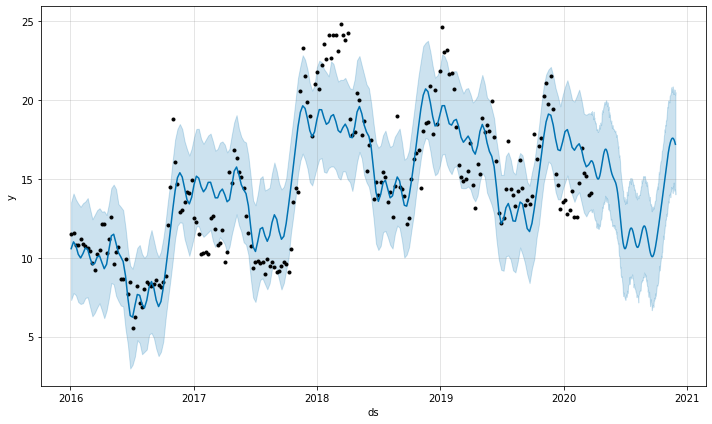

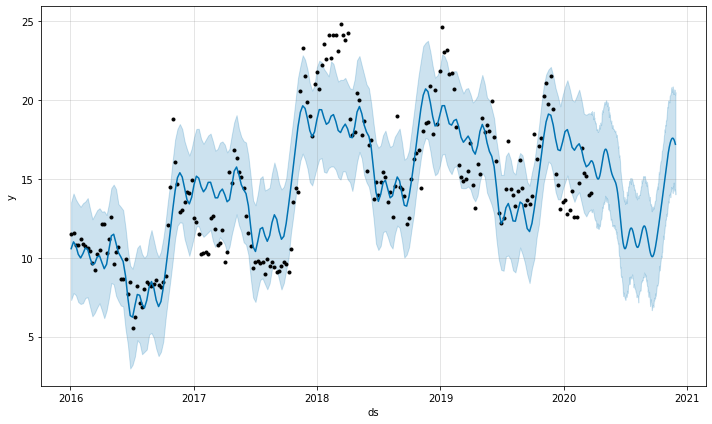

In [49]:
m3.plot(forecast3)

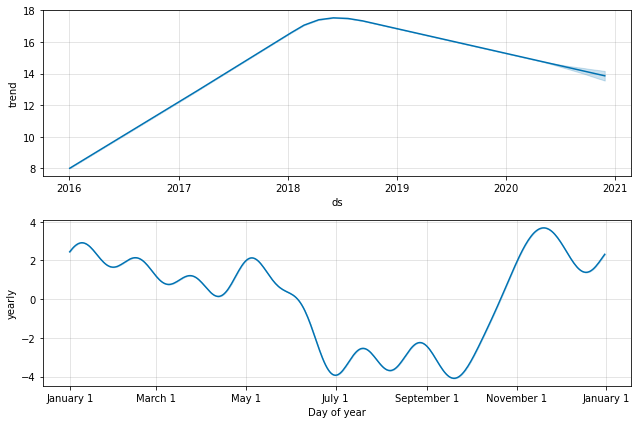

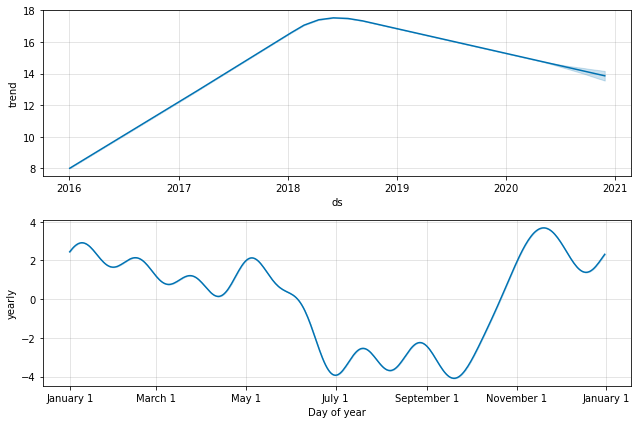

In [50]:
m3.plot_components(forecast3)

In [0]:

def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [52]:
cmp_df3 = make_comparison_dataframe(df3, forecast3)

cmp_df3.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2016-01-03,10.574860,7.321101,13.522052,11.495254
2016-01-10,11.004819,7.759045,14.072652,11.565690
2016-01-17,10.766975,7.631166,13.689677,10.832873
2016-01-24,10.219218,7.191003,13.430607,10.827456
2016-01-31,9.984394,7.069574,13.226115,11.193428


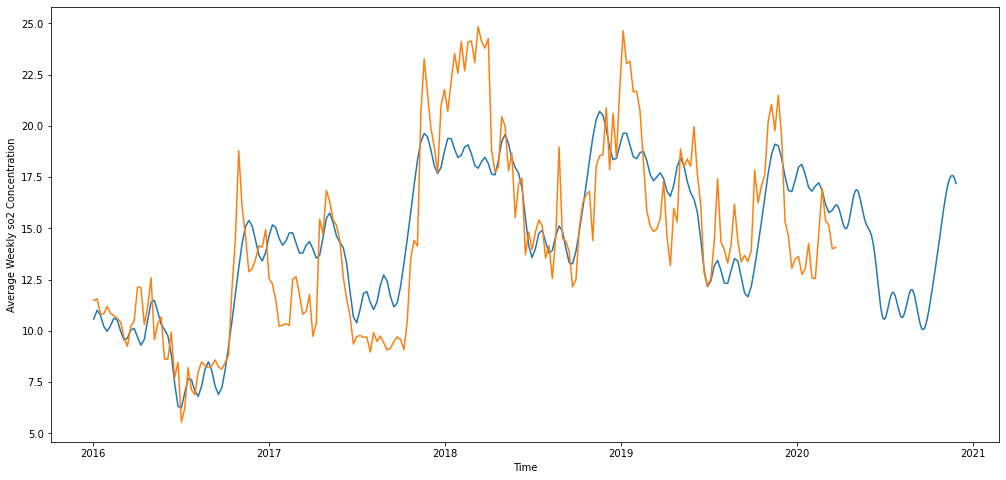

In [53]:

plt.figure(figsize=(17, 8))
plt.plot(cmp_df3['yhat'])
plt.plot(cmp_df3['y'])
plt.xlabel('Time')
plt.ylabel('Average Weekly so2 Concentration')
plt.grid(False)
plt.show()

**so2 during covid19**

In [0]:
#

In [56]:
df4 = df_after_covid_so2.reset_index()
df4.columns = ['ds', 'y']
df4.head()

,ds,y
0,2020-03-24,11.924167
1,2020-03-25,13.194531
2,2020-03-26,11.038333
3,2020-03-27,11.051614
4,2020-03-28,10.642447


In [57]:
m4 = Prophet()
m4.fit(df4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future4 = m4.make_future_dataframe(periods=40)

forecast4 = m4.predict(future4)

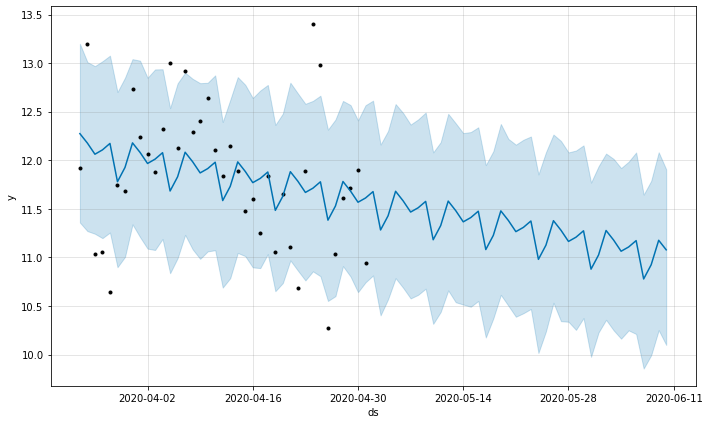

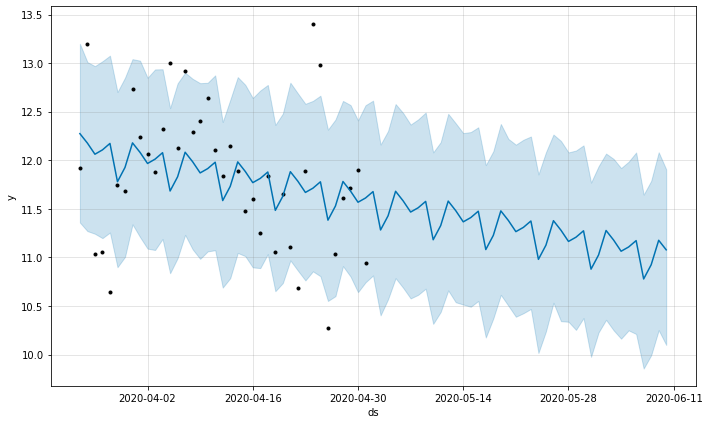

In [59]:
m4.plot(forecast4)

In [0]:

def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [61]:
cmp_df4 = make_comparison_dataframe(df4, forecast4)

cmp_df4.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2020-03-24,12.274103,11.358981,13.199056,11.924167
2020-03-25,12.176658,11.271021,13.010149,13.194531
2020-03-26,12.062226,11.243581,12.968963,11.038333
2020-03-27,12.106727,11.198439,13.018847,11.051614
2020-03-28,12.173277,11.256110,13.076544,10.642447


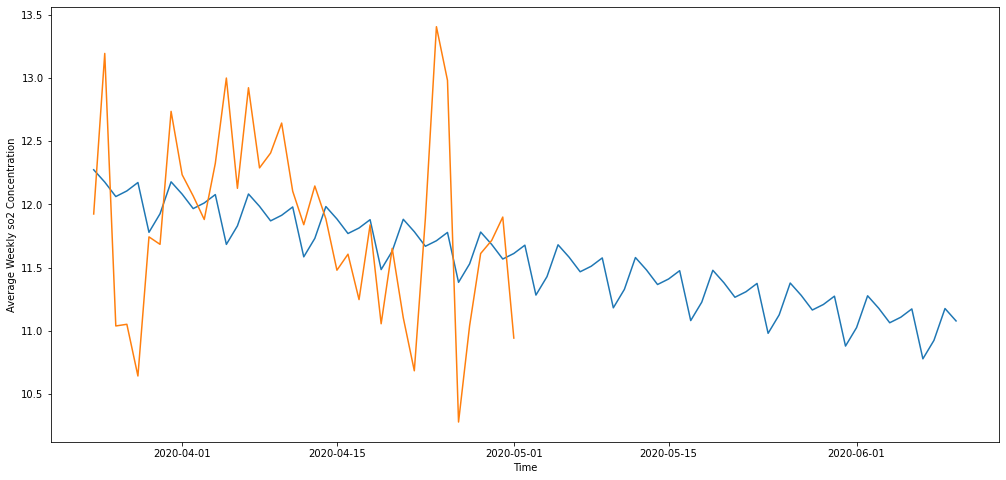

In [62]:
plt.figure(figsize=(17, 8))
plt.plot(cmp_df4['yhat'])
plt.plot(cmp_df4['y'])
plt.xlabel('Time')
plt.ylabel('Average Weekly so2 Concentration')
plt.grid(False)
plt.show()